In [75]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import Bio
from Bio import SeqIO

In [28]:
moscow = pd.read_csv('Moscow_data_official.csv', sep=';', decimal=',')
moscow.drop('cases.1', axis=1, inplace=True)
moscow.head()

,year,month,cases,death,calculated_death,officcial_death_per_100k,calculated_death_per_100k,cases_per_100k
0,2020,2,817,4,192,0.030534,1.465649,6.236641
1,2020,3,47609,475,-189,3.625954,-1.442748,363.427481
2,2020,4,125071,1775,1904,13.549618,14.534351,954.740458
3,2020,5,46574,1484,5865,11.328244,44.770992,355.526718
4,2020,6,19244,683,3894,5.213740,29.725191,146.900763


In [29]:
def population(row):
    if row['year'] == 2020:
        return 12678000
    elif row['year'] == 2021:
        return 12655000
    else:
        return 13015000

In [48]:
moscow['population'] = moscow.apply(population, axis=1)
moscow.head(5)

,year,month,cases,death,calculated_death,officcial_death_per_100k,calculated_death_per_100k,cases_per_100k,population
0,2020,2,817,4,192,0.030534,1.465649,6.236641,12678000
1,2020,3,47609,475,-189,3.625954,-1.442748,363.427481,12678000
2,2020,4,125071,1775,1904,13.549618,14.534351,954.740458,12678000
3,2020,5,46574,1484,5865,11.328244,44.770992,355.526718,12678000
4,2020,6,19244,683,3894,5.213740,29.725191,146.900763,12678000


In [84]:
moscow_death_total = pd.read_excel('moscow_data.xlsx')
moscow_death_total[['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь ', 'Декабрь']] = moscow_death_total[['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь ', 'Декабрь']].astype('float64')
moscow_death_total.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [87]:
pre_covid_moscow_death = moscow_death_total[~moscow_death_total['year'].isin([2020, 2021, 2022, 2023, 2024])]
covid_moscow_death = moscow_death_total[moscow_death_total['year'].isin([2020, 2021, 2022])]

In [89]:
covid_moscow_death

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
14,2020,10913.0,9864.0,10223.0,11834.0,15713.0,13126.0,10771.0,10972.0,11153.0,13710.0,14456.0,16546.0
15,2021,16347.0,12658.0,13213.0,12803.0,13705.0,16406.0,17334.0,12753.0,11855.0,14727.0,16553.0,14481.0
16,2022,14376.0,14496.0,11551.0,9144.0,9345.0,8914.0,8384.0,9755.0,10008.0,9703.0,10008.0,11304.0


In [94]:
def shapiro_calculations(df):
    for month in df.columns:
        if month == 'year':
            continue
        stat, pval = shapiro(df[month])
        if pval > 0.05: 
            print(month)
            print('Данные распредлены нормально')
            print(f'Statistic: {stat:.5f}, pval: {pval:.5f}')
            print('-'*10)
        else:
            print(month)
            print('Данныке НЕ распределены нормально')
            print(f'Statistic: {stat:.5f}, pval: {pval:.5f}')
            print('-'*10)

In [95]:
shapiro_calculations(pre_covid_moscow_death)

jan
Данные распредлены нормально
Statistic: 0.89295, pval: 0.08915
----------
feb
Данные распредлены нормально
Statistic: 0.90333, pval: 0.12609
----------
mar
Данные распредлены нормально
Statistic: 0.87744, pval: 0.05344
----------
apr
Данные распредлены нормально
Statistic: 0.93719, pval: 0.38355
----------
may
Данные распредлены нормально
Statistic: 0.91146, pval: 0.16549
----------
jun
Данные распредлены нормально
Statistic: 0.96778, pval: 0.84562
----------
jul
Данныке НЕ распределены нормально
Statistic: 0.48837, pval: 0.00000
----------
aug
Данныке НЕ распределены нормально
Statistic: 0.52567, pval: 0.00001
----------
sep
Данные распредлены нормально
Statistic: 0.91081, pval: 0.16189
----------
oct
Данные распредлены нормально
Statistic: 0.88911, pval: 0.07849
----------
nov
Данные распредлены нормально
Statistic: 0.97619, pval: 0.94664
----------
dec
Данные распредлены нормально
Statistic: 0.88495, pval: 0.06838
----------


<AxesSubplot:xlabel='jul', ylabel='Density'>

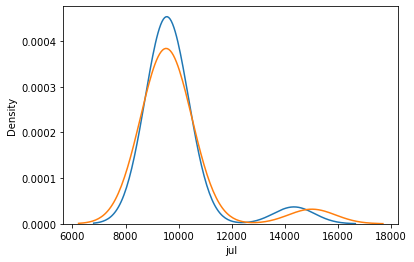

In [97]:
sns.kdeplot(pre_covid_moscow_death['jul'])
sns.kdeplot(pre_covid_moscow_death['aug'])

In [103]:
pre_covid_moscow_death['aug'].sort_values()

3      8905.0
8      9054.0
6      9184.0
7      9261.0
2      9472.0
5      9476.0
9      9476.0
13     9602.0
11     9618.0
12     9653.0
10    10034.0
0     10071.0
1     10098.0
4     15016.0
Name: aug, dtype: float64

In [109]:
test = pre_covid_moscow_death['aug']

In [128]:
pre_covid_outlers_list = {}

for month in pre_covid_moscow_death.columns:
    if month == 'year':
        continue
    
    iqr = pre_covid_moscow_death[month].quantile(0.75) - pre_covid_moscow_death[month].quantile(0.25)
    upper_bound = pre_covid_moscow_death[month].quantile(0.75) + 1.5 * iqr
    lower_bound = pre_covid_moscow_death[month].quantile(0.25) - 1.5 * iqr
    outlers = [x for x in pre_covid_moscow_death[month] if x > upper_bound or x < lower_bound] 
    
    pre_covid_outlers_list[month] = outlers

In [129]:
covid_outlers_list = {}

for month in covid_moscow_death.columns:
    if month == 'year':
        continue
    
    iqr = pre_covid_moscow_death[month].quantile(0.75) - pre_covid_moscow_death[month].quantile(0.25)
    upper_bound = pre_covid_moscow_death[month].quantile(0.75) + 1.5 * iqr
    lower_bound = pre_covid_moscow_death[month].quantile(0.25) - 1.5 * iqr
    outlers = [x for x in pre_covid_moscow_death[month] if x > upper_bound or x < lower_bound] 
    
    covid_outlers_list[month] = outlers

{'jan': [], 'feb': [], 'mar': [], 'apr': [], 'may': [], 'jun': [], 'jul': [10062.0, 14340.0, 10057.0], 'aug': [12557.0], 'sep': [], 'oct': [9350.0, 9830.0], 'nov': [10627.0], 'dec': [12080.0]}
{'jan': [], 'feb': [], 'mar': [], 'apr': [], 'may': [], 'jun': [], 'jul': [10062.0, 14340.0, 10057.0], 'aug': [12557.0], 'sep': [], 'oct': [9350.0, 9830.0], 'nov': [10627.0], 'dec': [12080.0]}


In [113]:
test

0     10071.0
1     10098.0
2      9472.0
3      8905.0
4     12557.0
5      9476.0
6      9184.0
7      9261.0
8      9054.0
9      9476.0
10    10034.0
11     9618.0
12     9653.0
13     9602.0
Name: aug, dtype: float64